In [1]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
%matplotlib inline

In [11]:
plt.style.use("default")

In [79]:
p_a = 3/10
p_b = 5/9
p_prior = 0.2

#0:blue, 1:red
data = [0,1,0,0,1,1,1,1,1,1]

In [80]:
N_data = 1
data[:3*N_data]

[0, 1, 0]

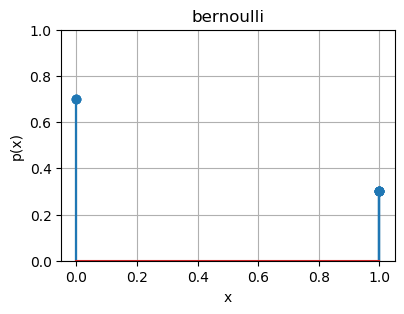

In [81]:
N_data = len(data)
likelihood_a = bernoulli.pmf(data[:N_data], p_a)
likelihood_b = bernoulli.pmf(data[:N_data], p_b)

fig = plt.figure(figsize=(4.3,3))
ax = fig.add_subplot(111)
ax.stem(data, likelihood_a)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_ylim(0,1)
ax.set_title('bernoulli')
ax.grid(True)

In [82]:
N_data = 6
likelihood_a = bernoulli.pmf(data[:N_data], p_a)
likelihood_b = bernoulli.pmf(data[:N_data], p_b)

In [83]:
likelihood_a

array([0.7, 0.3, 0.7, 0.7, 0.3, 0.3])

,post
0,0.380885
1,0.619115


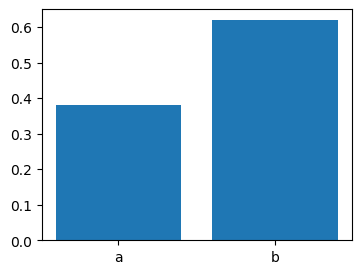

In [84]:
pa_posterior = p_prior
pb_posterior = p_prior

pa_posterior *= np.prod(likelihood_a)
pb_posterior *= np.prod(likelihood_b)

norm = pa_posterior + pb_posterior

df = pd.DataFrame([pa_posterior/norm , pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.figure(figsize=(4,3))
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])

df.head()

In [85]:
df_N = []
prob_a_N = []
prob_b_N = []
N_data = len(data)
for N_data in range(N_data):
    likelihood_a = bernoulli.pmf(data[:N_data], p_a)
    likelihood_b = bernoulli.pmf(data[:N_data], p_b)

    pa_posterior = p_prior
    pb_posterior = p_prior

    pa_posterior *= np.prod(likelihood_a)
    pb_posterior *= np.prod(likelihood_b)

    norm = pa_posterior + pb_posterior

    prob_a_N.append(pa_posterior/norm)
    prob_b_N.append(pb_posterior/norm)


prob_a_N = pd.Series(prob_a_N)
prob_b_N = pd.Series(prob_b_N)
df_N = pd.concat([prob_a_N, prob_b_N], axis=1)

In [86]:
df_N.head()

,0,1
0,0.500000,0.500000
1,0.611650,0.388350
2,0.459606,0.540394
3,0.572565,0.427435
4,0.678433,0.321567


(0, 1)

<Figure size 300x300 with 0 Axes>

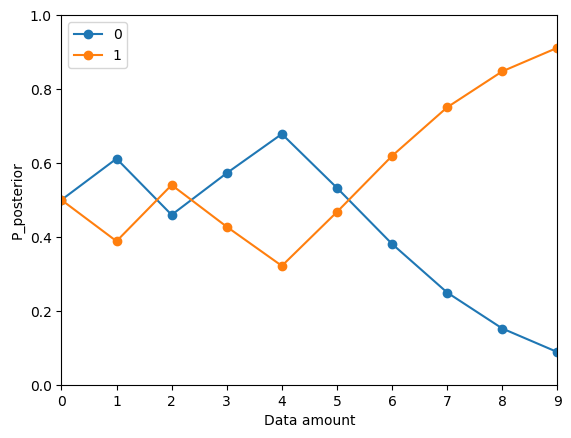

In [87]:
plt.figure(figsize=(3,3))
df_N.plot(marker="o")
plt.xlabel("Data amount")
plt.ylabel("P_posterior")
plt.ylim([0, 1])